# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [76]:
# Import the needed libraries

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style


style.use('seaborn')

In [77]:
# Create the dataframes

original_data = pd.read_csv('data/combined_data.csv')
additional_data = pd.read_excel('data/all-leaguetables.xlsx') 

/Users/sofiamurillosanchez/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#### Explaining the Data

**The Chosen "Original" Dataset**

The original dataset essentially consists of data related to the top 5 soccer (football) leagues. It contains data related to the teams in each league, their specific matches, scores, and specific stats related to those games (such as possession percentage and yellow and red card counts). This data gives us specific insight into the overall match performance of each team.

In [78]:
original_data.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,english
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english


**The Chosen "Additional" Dataset**

The additional dataset contains data pertaining to most of the soccer leagues present in the Original Dataset (Premier League, Bundesliga, La Liga, and MLS which is not in the Original Dataset). This data itself contains the specific team statistics rather than their match results, for example their overall number of wins/draws/losses and goals scored. The dataset gives us incredible insight into the actual ranking of the teams and their year-by-year performance.

In [79]:
additional_data.head()

,League,Season,Position,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,FinalPoints
0,Premier League,2015/16,2,Arsenal,38,20,11,7,65,36,29,71
1,Premier League,2015/16,20,Aston Villa,38,3,8,27,27,76,-49,17
2,Premier League,2015/16,16,Bournemouth,38,11,9,18,45,67,-22,42
3,Premier League,2015/16,10,Chelsea,38,12,14,12,59,53,6,50
4,Premier League,2015/16,15,Crystal Palace,38,11,9,18,39,51,-12,42


**Our Questions**

1. Can the specific statistics from team and match performance help indicate whether or not we can predict how a team will perform in the future?
2. Is there a correlation between team performance and individual match performance?
3. Are wins truly related to stats or external conditions that cannot be found within the data?
4. Is there a correlation between match excitement, match performance, and a team's season performance?

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

#### Describing the Original Dataset

By using .info(), we can see the datatype of each variable as well as missing variables and the total size of the dataset. The original data does not contain any missing values according to .info().

The timeframe spans from 2014-2020

In [80]:
original_data.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,english
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english


In [81]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12062 non-null  int64  
 1   Home Team                      12062 non-null  object 
 2   Away Team                      12062 non-null  object 
 3   Score                          12062 non-null  object 
 4   Half Time Score                12062 non-null  object 
 5   Match Excitement               12062 non-null  float64
 6   Home Team Rating               12062 non-null  float64
 7   Away Team Rating               12062 non-null  float64
 8   Home Team Possession %         12062 non-null  int64  
 9   Away Team Possession %         12062 non-null  int64  
 10  Home Team Off Target Shots     12062 non-null  float64
 11  Home Team On Target Shots      12062 non-null  float64
 12  Home Team Total Shots          12062 non-null 

In [82]:
original_data['year']

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
12057    2020
12058    2020
12059    2020
12060    2020
12061    2020
Name: year, Length: 12062, dtype: int64

In [83]:
# From here, we can see that there is a total of 146 teams within the original dataset

original_data['Home Team'].value_counts()

MAN UTD       133
SAMPDORIA     133
MAN CITY      133
VALENCIA      133
FIORENTINA    133
             ... 
NÜRNBERG       17
DARMSTADT      17
PADERBORN      17
BIELEFELD      17
INGOLSTADT     17
Name: Home Team, Length: 146, dtype: int64

In [84]:
# The above is confirmed by the number of away teams also being the same

original_data['Away Team'].value_counts()

JUVENTUS       133
REAL MADRID    133
SEVILLA FC     133
EIBAR          133
CELTA          133
              ... 
INGOLSTADT      17
DARMSTADT       17
NÜRNBERG        17
PADERBORN       17
BIELEFELD       17
Name: Away Team, Length: 146, dtype: int64

#### Describing the Additional Dataset

By using .info(), we can see the datatype of each variable as well as missing variables and the total size of the dataset. The additional data does not contain any missing values according to .info().

The timeframe spans from 2015-2019.

In [85]:
additional_data.head()

,League,Season,Position,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,FinalPoints
0,Premier League,2015/16,2,Arsenal,38,20,11,7,65,36,29,71
1,Premier League,2015/16,20,Aston Villa,38,3,8,27,27,76,-49,17
2,Premier League,2015/16,16,Bournemouth,38,11,9,18,45,67,-22,42
3,Premier League,2015/16,10,Chelsea,38,12,14,12,59,53,6,50
4,Premier League,2015/16,15,Crystal Palace,38,11,9,18,39,51,-12,42


In [86]:
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   League         399 non-null    object
 1   Season         399 non-null    object
 2   Position       399 non-null    object
 3   Team           399 non-null    object
 4   Matches        399 non-null    int64 
 5   Wins           399 non-null    int64 
 6   Draws          399 non-null    int64 
 7   Losses         399 non-null    int64 
 8   GoalsScored    399 non-null    int64 
 9   GoalsConceded  399 non-null    int64 
 10  GoalDiff       399 non-null    int64 
 11  FinalPoints    399 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 37.5+ KB


In [87]:
additional_data['Season']

0      2015/16
1      2015/16
2      2015/16
3      2015/16
4      2015/16
        ...   
394       2019
395       2019
396       2019
397       2019
398       2019
Name: Season, Length: 399, dtype: object

In [88]:
# From here, we can see that there is a total of 104 teams within the additional dataset

additional_data['Team'].value_counts()

Arsenal             5
Bayer Leverkusen    5
Chicago Fire        5
Real Madrid         5
Real Sociedad       5
                   ..
FC Union Berlin     1
SD Huesca           1
RCD Mallorca        1
FC Nurnberg         1
FC Cincinnati       1
Name: Team, Length: 104, dtype: int64

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

#### Data Dictionary - Original Data

**Home Team -**

**Away Team -**

**Away Team Score -**

**Half Time Score -** 

**Match Excitement -**

**Home Team Rating -** 

**Away Team Rating -** 

**Home Team Possession % -** 

**Away Team Possession % -** 

**Away Team Fouls -** 

**Away Team Yellow Cards -** 

**Away Team Second Yellow Cards -** 

**Away Team Red Cards -** 

**Home Team Goals Scored -** 

**Away Team Goals Scored -** 

**Home Team Goals Conceeded -** 

**Away Team Goals Conceeded -** 

**Year -** 

**League -** 

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Match Excitement'}>,
        <AxesSubplot:title={'center':'Home Team Rating'}>,
        <AxesSubplot:title={'center':'Away Team Rating'}>,
        <AxesSubplot:title={'center':'Home Team Possession %'}>,
        <AxesSubplot:title={'center':'Away Team Possession %'}>],
       [<AxesSubplot:title={'center':'Home Team Off Target Shots'}>,
        <AxesSubplot:title={'center':'Home Team On Target Shots'}>,
        <AxesSubplot:title={'center':'Home Team Total Shots'}>,
        <AxesSubplot:title={'center':'Home Team Blocked Shots'}>,
        <AxesSubplot:title={'center':'Home Team Corners'}>,
        <AxesSubplot:title={'center':'Home Team Throw Ins'}>],
       [<AxesSubplot:title={'center':'Home Team Pass Success %'}>,
        <AxesSubplot:title={'center':'Home Team Aerials Won'}>,
        <AxesSubplot:title={'center':'Home Team Clearances'}>,
        <AxesSubplot:title={'center':'Home Team Fouls'}

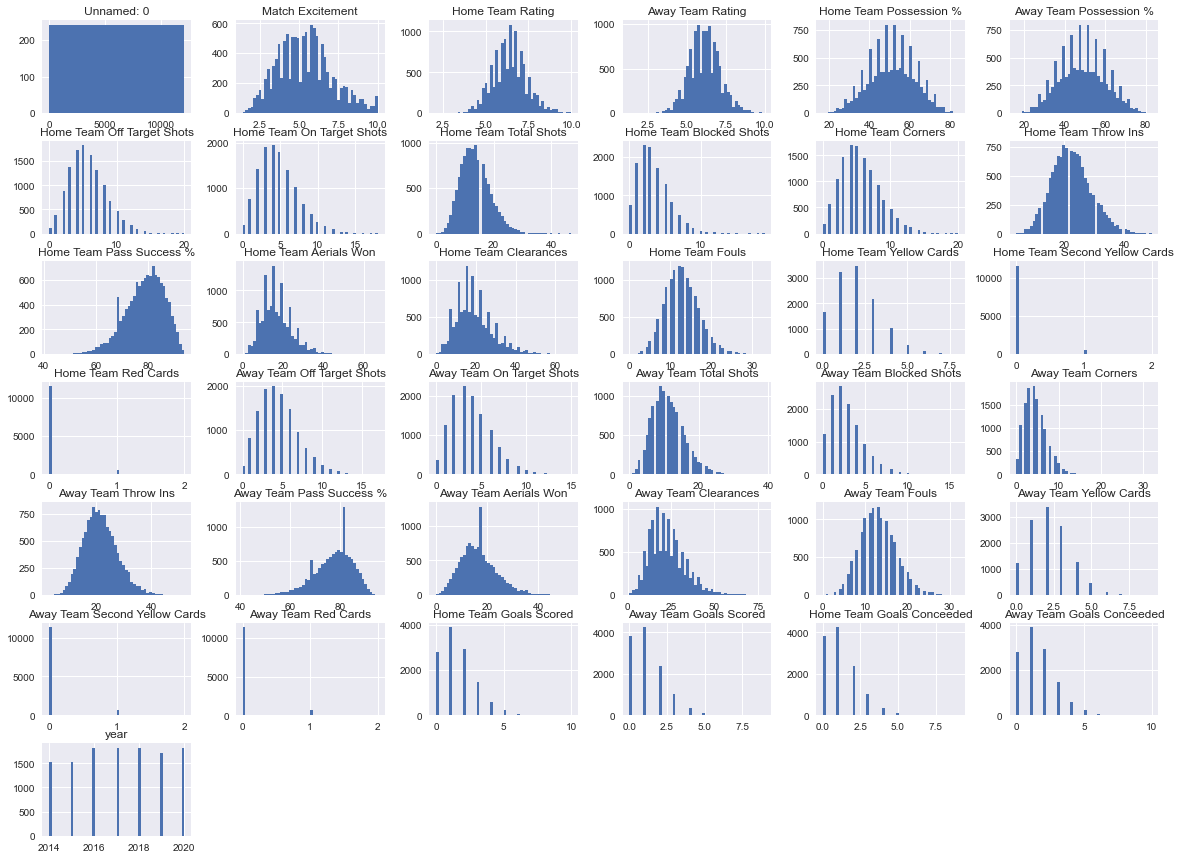

In [89]:
original_data.hist(bins=50, figsize=(20,15))

#### Data Dictionary - Additional Data

**League -** 

**Season -** 

**Team -**

**Wins -** 

**Draws -** 

**Losses -** 

**Goals Scored -** 

**Goals Conceded -** 

**Goal Diff -** 

**Final Points -**


array([[<AxesSubplot:title={'center':'Matches'}>,
        <AxesSubplot:title={'center':'Wins'}>,
        <AxesSubplot:title={'center':'Draws'}>],
       [<AxesSubplot:title={'center':'Losses'}>,
        <AxesSubplot:title={'center':'GoalsScored'}>,
        <AxesSubplot:title={'center':'GoalsConceded'}>],
       [<AxesSubplot:title={'center':'GoalDiff'}>,
        <AxesSubplot:title={'center':'FinalPoints'}>, <AxesSubplot:>]],
      dtype=object)

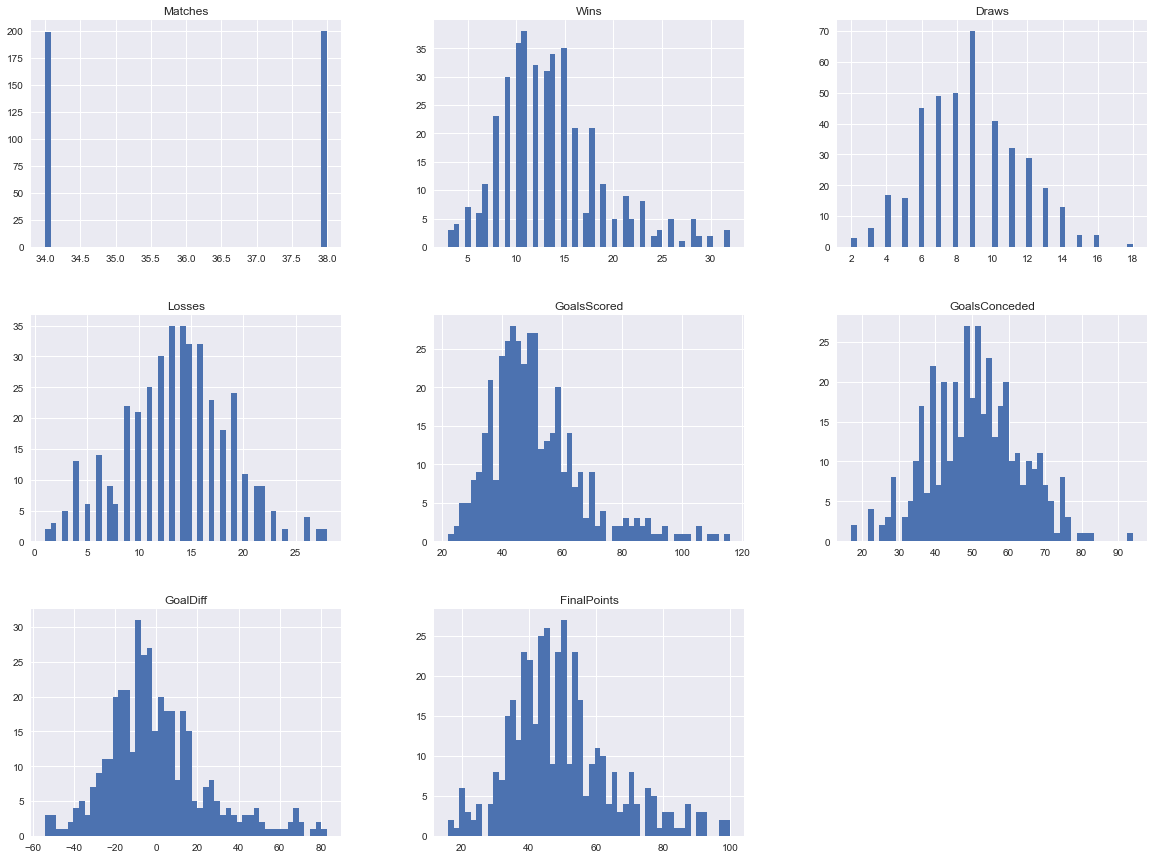

In [90]:
additional_data.hist(bins=50, figsize=(20,15))

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 